In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('madfhantr.csv')

In [21]:
# Visualize the first rows of the dataset
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
# Check for missing values in the entire dataframe
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
# Identify features and target variable
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

In [15]:
# Handle missing values 
X.fillna(0, inplace=True)

In [16]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Create a Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Test the model on a random sample
random_sample_index = X.sample(1, random_state=42).index[0]
random_sample = X.loc[random_sample_index].values.reshape(1, -1)
random_sample_true_label = y.loc[random_sample_index]
random_sample_pred_label = model.predict(random_sample)

# Display results
print(f'Accuracy: {accuracy:.4f}')
print('\nRandom Sample Test:')
print(f'True Label: {random_sample_true_label}')
print(f'Predicted Label: {random_sample_pred_label}')

Accuracy: 0.6341

Random Sample Test:
True Label: Y
Predicted Label: ['Y']


c:\Users\shaur\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


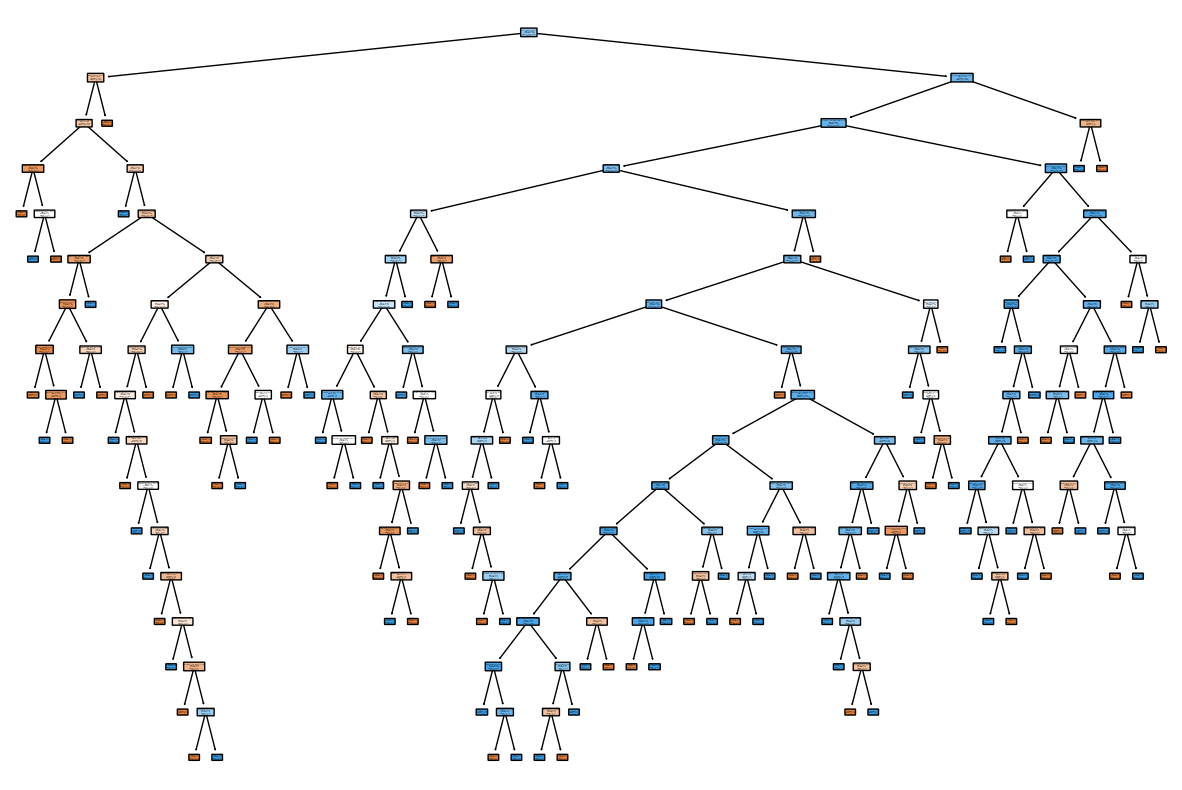

In [20]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['N', 'Y'], filled=True, rounded=True)
plt.show()